# Part 3: Handling Imbalanced Class (optional)

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Bad key "text.kerning_factor" on line 4 in
C:\Users\sumai\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Dataset
Please see the link to know more about the dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

- 1) ID number
- 2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)

In [2]:
df = pd.read_csv('preprocessed_breast_cancer.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Split Input and Traget Variables

In [3]:
X = df.drop('diagnosis', axis = 1) 
y = df['diagnosis']

In [4]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Train Test Split

In [5]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

print("Original shape of dataset: {}".format(df.shape))         # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape))      # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape))        # shape of testing dataset after split

Original shape of dataset: (569, 31)
Shape of training dataset: (426, 30)
Shape of testing dataset: (143, 30)


### Defining function for later use

In [6]:
def macro_weighted(y_test, y_hat):
    
    rec = recall_score(y_test, y_hat)
    print ("Recall Score:", round(rec, 4))

    rec_mac = recall_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Recall Score:", round(rec_mac, 4))

    rec_wei = recall_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Recall Score:", round(rec_wei, 4))
    
    print ('------------------------------------------------------')
    
    prec_mac = precision_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of Precision Score:", round(prec_mac, 4))

    prec_wei = precision_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of Precision Score:", round(prec_wei, 4))
    
    print ('------------------------------------------------------')

    f1_mac = f1_score(y_test, y_hat, average = 'macro')
    print ("Macro Average of F1 Score:", round(f1_mac, 4))

    f1_wei = f1_score(y_test, y_hat, average = 'weighted')
    print ("Weighted Average of F1 Score:", round(f1_wei, 4))

In [7]:
def cm():
    
        print('---------------------------------------------------------------')
        
        data = confusion_matrix(y_test, y_hat)
        df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
        df_cm.index.name = 'Actual'
        df_cm.columns.name = 'Predicted'
        plt.figure(figsize = (6, 4))
        #sns.set(font_scale=1.4) #for label size
        sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 12})# font size
        plt.show()
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
        print ("TP: {}, FP: {}, TN: {}, FN: {}".format(tp, fp, tn, fn))

In [8]:
def class_rep():
        
        # Print the precision and recall, among other metrics
        print('---------------------------------------------------------------')
        print(classification_report(y_test, y_hat, digits=3))

### Handling Imbalanced Dataset

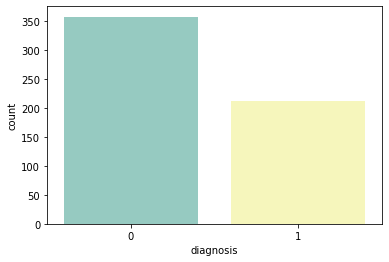

In [9]:
sns.countplot(df['diagnosis'], palette = "Set3")

#### Resampling Techniques - Oversample Minority Class

Oversampling can be defined as adding more copies of the minority class. In other words, we are creating artificial/synthetic data of the minority class (or group). Oversampling could be a good choice when you don’t have a lot of data to work with. We will use the resampling module from Scikit-Learn library to randomly create artificial samples of data from the minority class.

In [10]:
# 'resample' is located under sklearn.utils
from sklearn.utils import resample

# concatenate training data back together
train_data = pd.concat([X_train, y_train], axis = 1)

# separate minority and majority class
not_cancer = train_data[train_data['diagnosis']==0]
Cervical = train_data[train_data['diagnosis']==1]

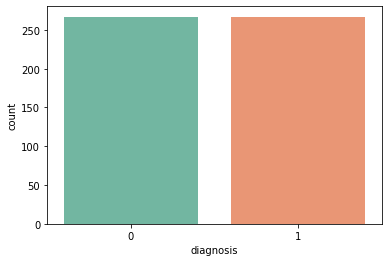

In [11]:
# Unsample minority; we are oversampling the minority class to match the number of majority classs
Cervical_oversampled = resample(Cervical,
                           replace = True, # Sample with replacement
                           n_samples = len(not_cancer), # Match number in majority class
                           random_state=27)

# combine majority and upsampled minority
oversampled = pd.concat([not_cancer, Cervical_oversampled])
sns.countplot(oversampled['diagnosis'], palette = "Set2")

Recall Score: 0.9434
Macro Average of Recall Score: 0.955
Weighted Average of Recall Score: 0.958
------------------------------------------------------
Macro Average of Precision Score: 0.955
Weighted Average of Precision Score: 0.958
------------------------------------------------------
Macro Average of F1 Score: 0.955
Weighted Average of F1 Score: 0.958
---------------------------------------------------------------


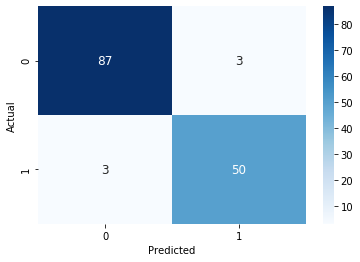

TP: 50, FP: 3, TN: 87, FN: 3
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.967     0.967     0.967        90
           1      0.943     0.943     0.943        53

    accuracy                          0.958       143
   macro avg      0.955     0.955     0.955       143
weighted avg      0.958     0.958     0.958       143



In [12]:
X_train = oversampled.drop('diagnosis', axis = 1) 
y_train = oversampled['diagnosis']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = AdaBoostClassifier(random_state = 42)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

macro_weighted(y_test, y_hat)
cm()
class_rep()

#### Generate Synthetic Samples: SMOTE

Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model. It’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

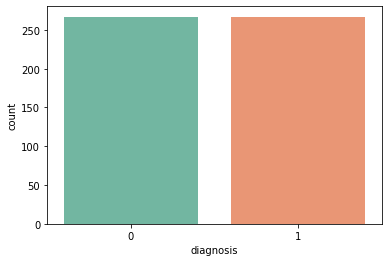

In [13]:
df = pd.read_csv('preprocessed_breast_cancer.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)

X = df.drop('diagnosis', axis = 1) 
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

# import SMOTE 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 25, sampling_strategy='auto')   # again we are eqalizing both the classes

# fit the sampling
X_train, y_train = sm.fit_sample(X_train, y_train)
np.unique(y_train, return_counts=True)     # Y_train is numpy array, so unique() functions returns the count of all the unique elements in the array

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

sns.countplot(y_train, palette = "Set2")

Recall Score: 0.9434
Macro Average of Recall Score: 0.9661
Weighted Average of Recall Score: 0.972
------------------------------------------------------
Macro Average of Precision Score: 0.9739
Weighted Average of Precision Score: 0.9722
------------------------------------------------------
Macro Average of F1 Score: 0.9698
Weighted Average of F1 Score: 0.9719
---------------------------------------------------------------


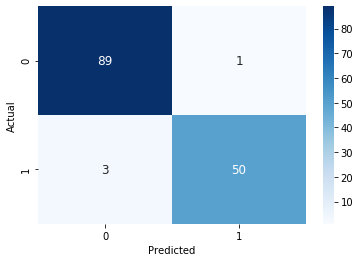

TP: 50, FP: 1, TN: 89, FN: 3
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.967     0.989     0.978        90
           1      0.980     0.943     0.962        53

    accuracy                          0.972       143
   macro avg      0.974     0.966     0.970       143
weighted avg      0.972     0.972     0.972       143



In [14]:
model = AdaBoostClassifier(random_state = 42)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

macro_weighted(y_test, y_hat)
cm()
class_rep()

#### SMOTETomek

In [15]:
df = pd.read_csv('preprocessed_breast_cancer.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)

X = df.drop('diagnosis', axis = 1) 
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

The number of classes before fit Counter({0: 267, 1: 159})
The number of classes after fit Counter({0: 263, 1: 249})


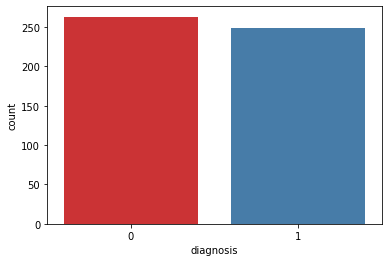

In [16]:
from imblearn.combine import SMOTETomek
from collections import Counter
smot = SMOTETomek(0.95)
X_train_ns, y_train_ns = smot.fit_sample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

sns.countplot(y_train_ns, palette = "Set1")

Recall Score: 0.9811
Macro Average of Recall Score: 0.9628
Weighted Average of Recall Score: 0.958
------------------------------------------------------
Macro Average of Precision Score: 0.9503
Weighted Average of Precision Score: 0.9602
------------------------------------------------------
Macro Average of F1 Score: 0.9557
Weighted Average of F1 Score: 0.9583
---------------------------------------------------------------


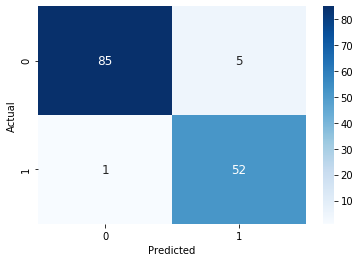

TP: 52, FP: 5, TN: 85, FN: 1
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.988     0.944     0.966        90
           1      0.912     0.981     0.945        53

    accuracy                          0.958       143
   macro avg      0.950     0.963     0.956       143
weighted avg      0.960     0.958     0.958       143



In [17]:
model = AdaBoostClassifier(random_state = 42)
model.fit(X_train_ns, y_train_ns)
y_hat = model.predict(X_test)

macro_weighted(y_test, y_hat)
cm()
class_rep()

### How does the EasyEnsemble Classifier perform itself?

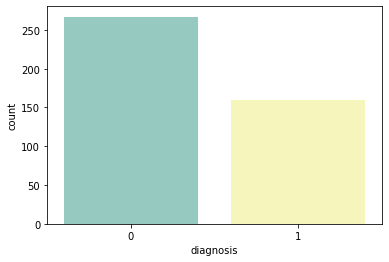

In [18]:
df = pd.read_csv('preprocessed_breast_cancer.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)

X = df.drop('diagnosis', axis = 1) 
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

sns.countplot(y_train, palette = "Set3")

Recall Score: 0.9811
Macro Average of Recall Score: 0.9795
Weighted Average of Recall Score: 0.979
------------------------------------------------------
Macro Average of Precision Score: 0.9759
Weighted Average of Precision Score: 0.9792
------------------------------------------------------
Macro Average of F1 Score: 0.9776
Weighted Average of F1 Score: 0.9791
---------------------------------------------------------------


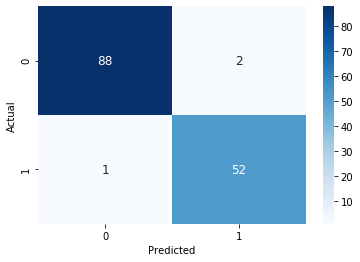

TP: 52, FP: 2, TN: 88, FN: 1
---------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.989     0.978     0.983        90
           1      0.963     0.981     0.972        53

    accuracy                          0.979       143
   macro avg      0.976     0.979     0.978       143
weighted avg      0.979     0.979     0.979       143



In [19]:
model = AdaBoostClassifier(random_state = 42)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

macro_weighted(y_test, y_hat)
cm()
class_rep()

### Conclusion: let's not create synthetic sample in this dataset.